Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn import linear_model

In [2]:
#helper function for histogram labeling
def myhist(dataset,**kwargs):
    mybins = np.arange(dataset.min(), dataset.max()+2)
    print(mybins)
    plt.figure(figsize=(20,10))
    counts, bins, patches=plt.hist(dataset,bins = mybins,align='left',rwidth=0.9 )
    bin_centers = 0.5 * np.diff(bins) + bins[:-1]-0.5
    for count, x in zip(counts, bin_centers):
        # Label the raw counts
        plt.annotate(str(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
            xytext=(0, -18), textcoords='offset points', va='top', ha='center')

            # Label the percentages
        percent = '%0.0f%%' % (100 * float(count) / counts.sum())
        plt.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
            xytext=(0, -32), textcoords='offset points', va='top', ha='center')
    plt.xticks(np.arange(dataset.min(), dataset.max()+1))
    return
    



# TASK 1
Generate the set of possible dice rolls

[ 3  4  5  6  7  8  4  5  6  7  8  9  5  6  7  8  9 10  6  7  8  9 10 11
  7  8  9 10 11 12  8  9 10 11 12 13  4  5  6  7  8  9  5  6  7  8  9 10
  6  7  8  9 10 11  7  8  9 10 11 12  8  9 10 11 12 13  9 10 11 12 13 14
  5  6  7  8  9 10  6  7  8  9 10 11  7  8  9 10 11 12  8  9 10 11 12 13
  9 10 11 12 13 14 10 11 12 13 14 15  6  7  8  9 10 11  7  8  9 10 11 12
  8  9 10 11 12 13  9 10 11 12 13 14 10 11 12 13 14 15 11 12 13 14 15 16
  7  8  9 10 11 12  8  9 10 11 12 13  9 10 11 12 13 14 10 11 12 13 14 15
 11 12 13 14 15 16 12 13 14 15 16 17  8  9 10 11 12 13  9 10 11 12 13 14
 10 11 12 13 14 15 11 12 13 14 15 16 12 13 14 15 16 17 13 14 15 16 17 18]
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
roll mean 10.5
roll variance 8.790697674418604
roll standard deviation 2.9649110736105735
stdvec 
 [ 1.60526678  4.57017785  7.53508893 10.5        13.46491107 16.42982215
 19.39473322]


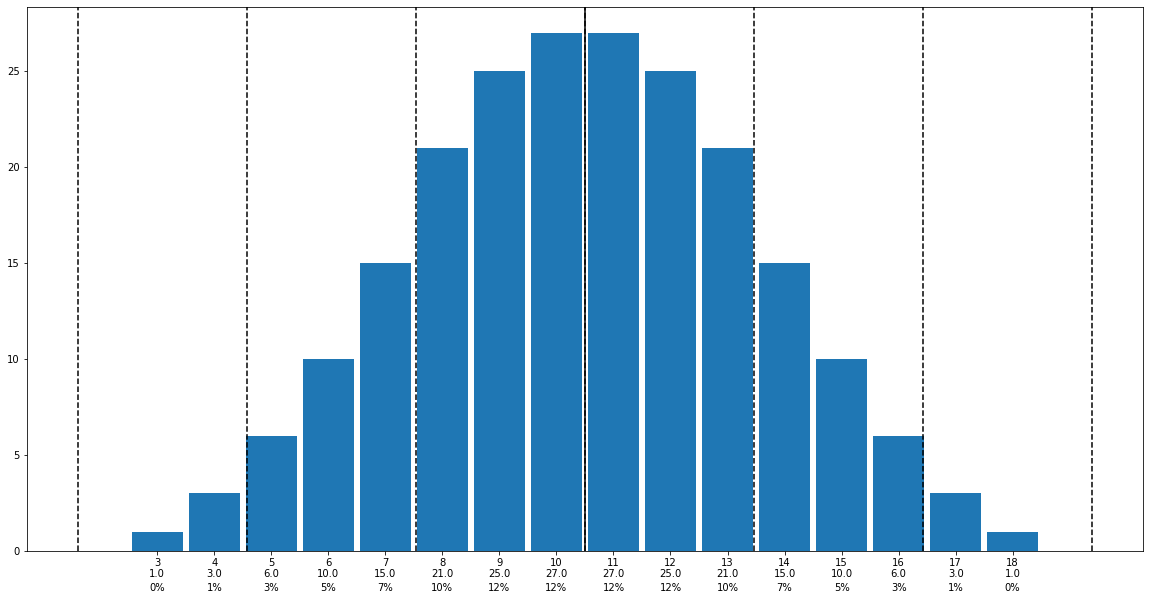

In [3]:
possibleDie = np.array([[1,2,3,4,5,6]])
onesMask = np.ones((6,6,1))
roll_1_3d = np.dot(onesMask,possibleDie)
print
rdim1 = roll_1_3d
rdim2 = roll_1_3d.swapaxes(1,2)
rdim3 = roll_1_3d.swapaxes(0,2)
#print("\n rdim1 \n",rdim1)
#print(rdim1.shape)
#print("\n rdim2 \n", rdim2)
#print(rdim2.shape)
#print(rdim3)
#print(rdim3.shape)

roll3=rdim1+rdim2+rdim3
roll3vec = roll3.flatten().astype(int)
print(roll3vec)

myhist(roll3vec)
    
roll3mean = np.mean(roll3vec)
print("roll mean", roll3mean)
roll3var = np.var(roll3vec,ddof=1)
print("roll variance", roll3var)
roll3std = np.sqrt(roll3var)
print("roll standard deviation", roll3std)

#plot the mean line
plt.axvline(x=roll3mean, color='k')

#plot the standard deviation lines for 1...3
stdvec=np.arange(-3,4)*roll3std+roll3mean
print("stdvec \n", stdvec)
for location in stdvec:
    plt.axvline(x=location, color='k',linestyle='--')


plt.show()
#roll3possibilities = 

# TASK 2
Bootstrapping estimation of population statistics

[ 7  8  9 10 11 12 13 14]


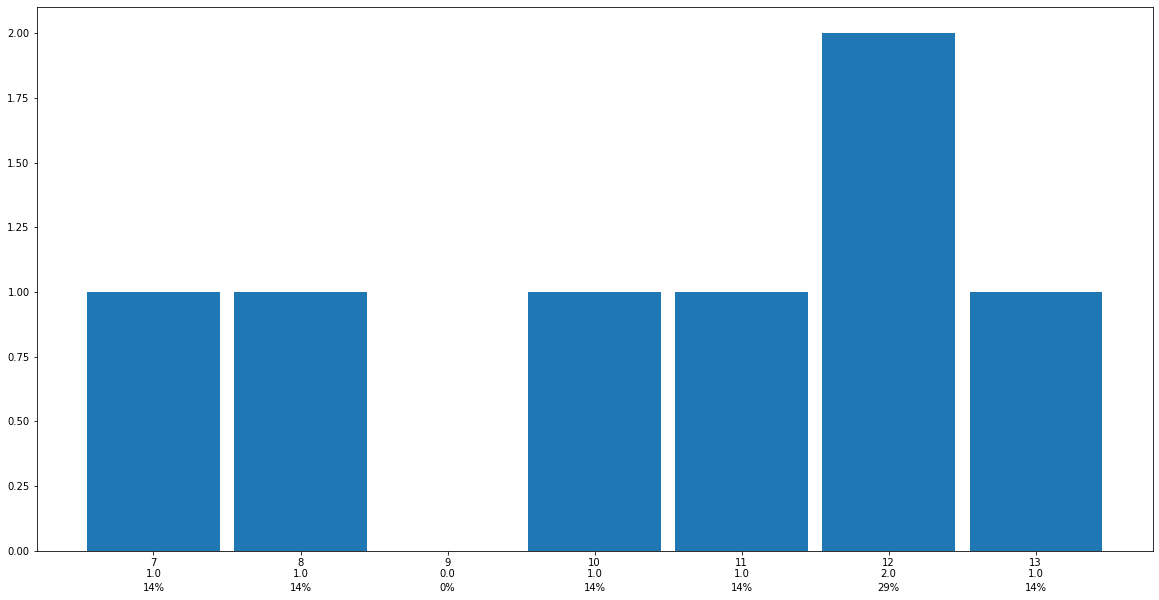

Roll count =  7
Mean of Original Rolls = 10.428571428571429
Variance of Original Rolls = 4.244897959183674

Mean of 1000 bootstrapped sets of Rolls =  10.419142857142859
Average Variance of 1000 bootstrapped sets of Rolls = 4.234428571428571
Standard dev of 1000 bootstrapped sets of Rolls = 0.7883086271988947


Text(0.5, 1.0, 'Histogram of variances of 1000 bootstraps of the 10 rolls')

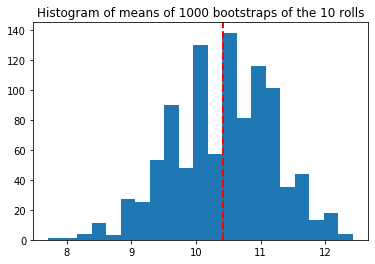

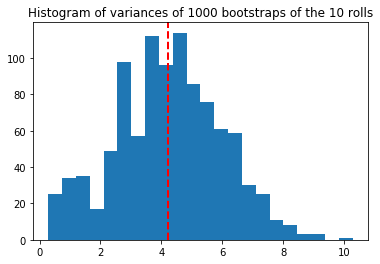

In [5]:
#BOOTSTRAPPING
rolls = np.array([13,8,7,12,12,10,11])
myhist(rolls)
plt.show()

print("Roll count = ", rolls.shape[0])
print("Mean of Original Rolls =", rolls.mean())
print("Variance of Original Rolls =", np.var(rolls))

# STEP 1d compute the result of bootstrap sampling
samplesize = 1000
sample = np.random.choice(rolls,(samplesize,rolls.size))

# STEP 2  compute statistics
rollmeans = np.mean(sample,axis=1)  #mean of each bootstrap sample
rollvars = np.var(sample,1,ddof=1)  #variance of each bootstrap sample (with )

# STEP 3
rollmean = np.mean(rollmeans)  # est population mean: overall mean of the means of the bootstraps

# STEP 4
#standard error of the mean
rollmean_std = np.sqrt(np.sum((rollmeans-rollmean)**2)/(samplesize-1))

rollvar = np.mean(rollvars) #average variance


print()
print("Mean of 1000 bootstrapped sets of Rolls = ", rollmean)
print("Average Variance of 1000 bootstrapped sets of Rolls =", rollvar)
print("Standard dev of 1000 bootstrapped sets of Rolls =", rollmean_std)

#plt.figure()
#plt.hist(sample.ravel())

#myhist(rollmeans)

#STEP 5
plt.figure()
plt.hist(rollmeans,bins = 'auto')
plt.axvline(rollmeans.mean(), color='r', linestyle='dashed', linewidth=2)
plt.title("Histogram of means of 1000 bootstraps of the 10 rolls")

# STEP 6
plt.figure()
plt.hist(rollvars,bins = 'auto')
plt.axvline(rollvars.mean(), color='r', linestyle='dashed', linewidth=2)
plt.title("Histogram of variances of 1000 bootstraps of the 10 rolls")


# TASK 3
Population estimation through large sampling

In [5]:
#SIMULATED LARGE SAMPLE

